# 2021B
C4 烯烃广泛应用于化工产品及医药的生产，乙醇是生产制备 C4 烯烃的原料。在制备过程中，催化剂组合（即：Co 负载量、Co/SiO2 和 HAP 装料比、乙醇浓度的组合）与温度对 C4 烯烃的选择性和 C4 烯烃收率将产生影响（名词解释见附录）。因此通过对催化剂组合设计，探索乙醇催化偶合制备 C4 烯烃的工艺条件具有非常重要的意义和价值。
某化工实验室针对不同催化剂在不同温度下做了一系列实验，结果如附件 1 和附件 2 所示。请通过数学建模完成下列问题

In [1]:
# 修复seaborn负号和中文显示乱码的问题
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial']  # 设置合适的字体，如 Arial
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置支持中文的字体，如黑体
plt.rcParams['axes.unicode_minus'] = False     # 解决负号显示问题
plt.rcParams['figure.dpi'] = 100              # 调整图形分辨率

# 数据准备


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

import os
for dirname, _, filenames in os.walk('.\datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# 任何在这个工程文件夹的datasets子文件夹中的文件将被输出

#忽略警告
import warnings
warnings.filterwarnings('ignore')

# 改style要在改font之前
plt.style.use('seaborn')  

.\datasets\data1.csv
.\datasets\data1.docx
.\datasets\data2.csv
.\datasets\data2.docx
.\datasets\data3.doc
.\datasets\yanan1.png
.\datasets\~$附件1.xlsx
.\datasets\长江水污染--附件1.doc
.\datasets\长江水污染--附件2.doc
.\datasets\长江水污染--附件3.doc
.\datasets\长江水污染--附件4.doc
.\datasets\附件1.xlsx
.\datasets\附件2.xlsx
.\datasets\题目.doc


In [3]:

data2 = pd.read_excel(r'.\datasets\附件2.xlsx')

In [4]:
data1 = pd.read_excel(r'.\datasets\附件1.xlsx')
print(data1.shape)
data1.drop(['催化剂组合'],axis=1,inplace=True)
data1.head()

(114, 10)


,催化剂组合编号,温度,乙醇转化率(%),乙烯选择性（%）,C4烯烃选择性(%),乙醛选择性(%),碳数为4-12脂肪醇 选择性(%),甲基苯甲醛和甲基苯甲醇选择性(%),其他生成物的选择性(%)
0,A1,250,2.067169,1.17,34.05,2.41,52.59,0.00,9.78
1,NaN,275,5.851721,1.63,37.43,1.42,53.21,0.00,6.31
2,NaN,300,14.968891,3.02,46.94,4.71,35.16,1.00,9.17
3,NaN,325,19.681359,7.97,49.70,14.69,15.16,2.13,10.35
4,NaN,350,36.801017,12.46,47.21,18.66,9.22,1.69,10.76


In [5]:
# 假设你的列表是 input_list
input_list = data1['催化剂组合编号'].values.tolist()

# 初始化变量，用于保存之前的非 nan 值
previous_value = None
output_list = []

# 遍历列表，将 nan 值替换为之前的非 nan 值
for value in input_list:
    if isinstance(value, (str)):  # 检查是否是字符串类型
        if not value=='NaN':  # 检查是否不是 nan
            previous_value = value
        output_list.append(value)
    else:
        output_list.append(previous_value) if previous_value is not None else None

print(output_list)
data1['催化剂组合编号']=output_list
data1

['A1', 'A1', 'A1', 'A1', 'A1', 'A2', 'A2', 'A2', 'A2', 'A2', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3', 'A4', 'A4', 'A4', 'A4', 'A4', 'A4', 'A5', 'A5', 'A5', 'A5', 'A5', 'A5', 'A6', 'A6', 'A6', 'A6', 'A6', 'A7', 'A7', 'A7', 'A7', 'A7', 'A8', 'A8', 'A8', 'A8', 'A8', 'A9', 'A9', 'A9', 'A9', 'A9', 'A10', 'A10', 'A10', 'A10', 'A10', 'A11', 'A11', 'A11', 'A11', 'A11', 'A12', 'A12', 'A12', 'A12', 'A12', 'A13', 'A13', 'A13', 'A13', 'A13', 'A14', 'A14', 'A14', 'A14', 'A14', 'B1', 'B1', 'B1', 'B1', 'B1', 'B2', 'B2', 'B2', 'B2', 'B2', 'B3', 'B3', 'B3', 'B3', 'B3', 'B3', 'B4', 'B4', 'B4', 'B4', 'B4', 'B4', 'B5', 'B5', 'B5', 'B5', 'B5', 'B5', 'B6', 'B6', 'B6', 'B6', 'B6', 'B6', 'B7', 'B7', 'B7', 'B7', 'B7', 'B7']


,催化剂组合编号,温度,乙醇转化率(%),乙烯选择性（%）,C4烯烃选择性(%),乙醛选择性(%),碳数为4-12脂肪醇 选择性(%),甲基苯甲醛和甲基苯甲醇选择性(%),其他生成物的选择性(%)
0,A1,250,2.067169,1.17,34.05,2.41,52.59,0.00,9.78
1,A1,275,5.851721,1.63,37.43,1.42,53.21,0.00,6.31
2,A1,300,14.968891,3.02,46.94,4.71,35.16,1.00,9.17
3,A1,325,19.681359,7.97,49.70,14.69,15.16,2.13,10.35
4,A1,350,36.801017,12.46,47.21,18.66,9.22,1.69,10.76
...,...,...,...,...,...,...,...,...,...
109,B7,275,7.900000,0.15,6.62,3.49,79.79,5.67,4.28
110,B7,300,11.700000,0.20,12.86,6.47,68.02,6.71,5.74
111,B7,325,17.800000,1.42,18.45,7.94,59.12,7.14,5.93
112,B7,350,30.200000,1.53,25.05,10.30,49.36,6.30,7.46


In [6]:
new_columns=['时间(min)','乙醇转化率(%)','乙烯选择性','C4烯烃选择性','乙醛选择性','碳数为4-12脂肪醇','甲基苯甲醛和甲基苯甲醇','其他']
data2.columns=new_columns
df2=data2.drop(data2.index[:2])
df2

,时间(min),乙醇转化率(%),乙烯选择性,C4烯烃选择性,乙醛选择性,碳数为4-12脂肪醇,甲基苯甲醛和甲基苯甲醇,其他
2,20,43.547389,4.23,39.9,5.17,39.7,2.58,8.42
3,70,37.788146,4.28,38.55,5.6,37.36,4.28,9.93
4,110,36.55636,4.46,36.72,6.37,32.39,4.63,15.43
5,163,32.721857,4.63,39.53,7.82,31.29,4.8,11.93
6,197,31.710097,4.62,38.96,8.19,31.49,4.26,12.48
7,240,29.85423,4.76,40.32,8.42,32.36,4.48,9.66
8,273,29.906009,4.68,39.04,8.79,30.86,3.95,12.68


# 第一问
对附件 1 中每种催化剂组合，分别研究乙醇转化率、C4 烯烃的选择性与温度的关系，并对附件 2 中 350 度时给定的催化剂组合在一次实验不同时间的测试结果进行分析。

## 第一小问
每种催化剂组合，乙醇转化率与温度的关系

表格中给了21种催化剂组合，那么我们就要研究对于这21种组合进行分析，但是太多了，首先先挑典型（A1A2A3A4），然后这种分析关系的题，应该是和回归分析/相关性分析搭上关系的，我们首先需要绘制散点图

In [7]:
df1=data1.iloc[:5]
df1

,催化剂组合编号,温度,乙醇转化率(%),乙烯选择性（%）,C4烯烃选择性(%),乙醛选择性(%),碳数为4-12脂肪醇 选择性(%),甲基苯甲醛和甲基苯甲醇选择性(%),其他生成物的选择性(%)
0,A1,250,2.067169,1.17,34.05,2.41,52.59,0.00,9.78
1,A1,275,5.851721,1.63,37.43,1.42,53.21,0.00,6.31
2,A1,300,14.968891,3.02,46.94,4.71,35.16,1.00,9.17
3,A1,325,19.681359,7.97,49.70,14.69,15.16,2.13,10.35
4,A1,350,36.801017,12.46,47.21,18.66,9.22,1.69,10.76


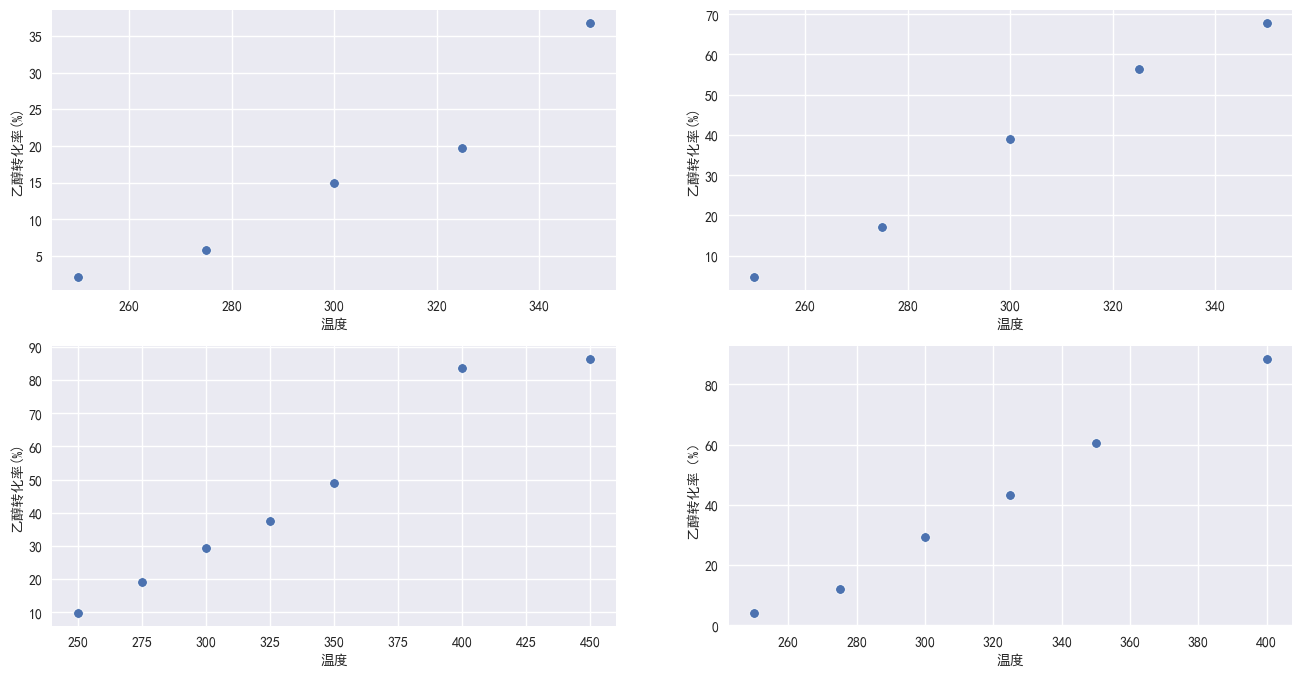

In [8]:
# 修复seaborn负号和中文显示乱码的问题
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial']  # 设置合适的字体，如 Arial
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置支持中文的字体，如黑体
plt.rcParams['axes.unicode_minus'] = False     # 解决负号显示问题
plt.rcParams['figure.dpi'] = 100              # 调整图形分辨率

import seaborn as sns
import matplotlib.pyplot as plt
# 创建一个指定大小的图形
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

index=['A1','A2','A3','A4']

for i in range(4):
    # 使用 Seaborn 绘制散点图
    sns.scatterplot(x='温度', y='乙醇转化率(%)', data=data1[data1['催化剂组合编号']==index[i]], ax=axes[i//2][i%2])
    # 添加标题和坐标轴标签
    plt.xlabel('温度')
    plt.ylabel('乙醇转化率（%）')

# 显示图形
plt.show()

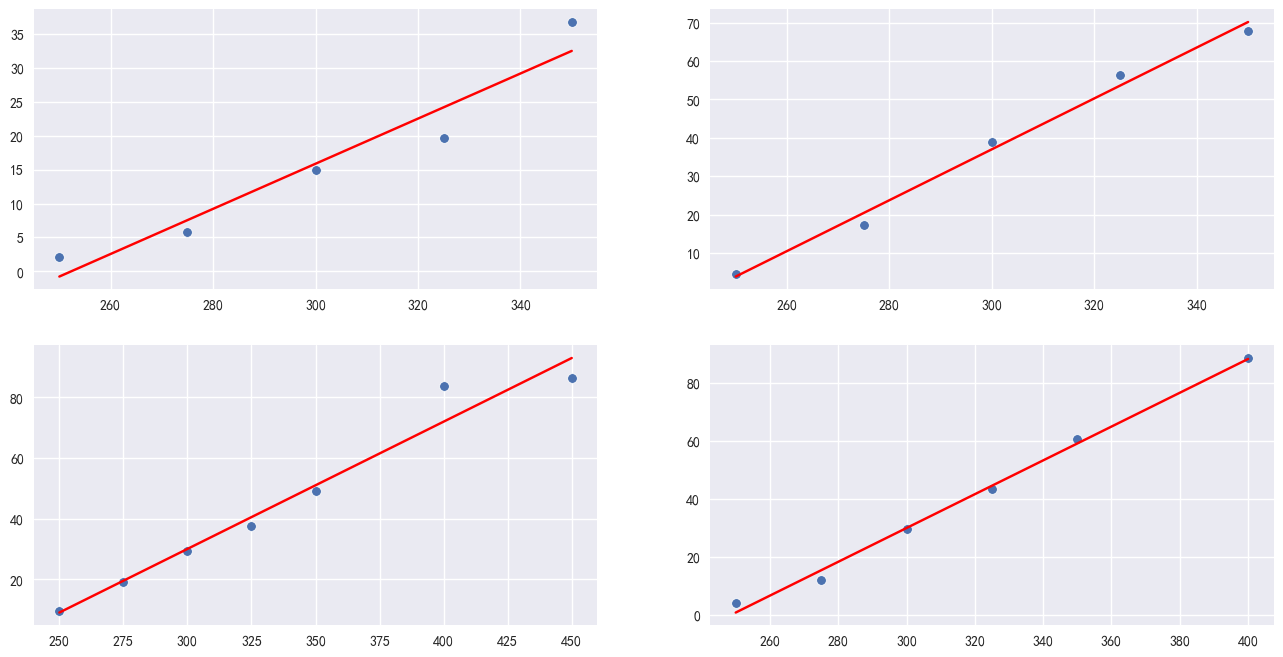

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

index=['A1','A2','A3','A4']

for i in range(4):
    df1=data1[data1['催化剂组合编号']==index[i]]
    #线性拟合
    from sklearn.linear_model import LinearRegression
    #实例化线性模型
    x=df1['温度'].values
    y=df1['乙醇转化率(%)'].values
    lr = LinearRegression()
    lr.fit(x.reshape(-1,1), y.reshape(-1,1))
    y_predict = lr.predict(x.reshape(-1,1))

    plt.figure(figsize=(6, 4))  # 设置宽度为 8 英寸，高度为 6 英寸

    sns.scatterplot(x=x,y=y,ax=axes[i//2][i%2])
    # 绘制线性拟合直线
    axes[i//2][i%2].plot(x, y_predict, color='red', label='Linear Fit')


线性拟合不一定是最优解，可以考虑多项式拟合

[ 2.83191627e-06 -3.36056848e-03  1.48998313e+00 -2.92230338e+02
  2.13824153e+04]
[ 1.24840195e-06 -1.57860257e-03  7.42411818e-01 -1.53217744e+02
  1.16973953e+04]
[-3.26504981e-07  4.34830393e-04 -2.13548346e-01  4.62880857e+01
 -3.73479582e+03]
[ 2.41944148e-07 -3.29501160e-04  1.66849063e-01 -3.66148658e+01
  2.93287151e+03]


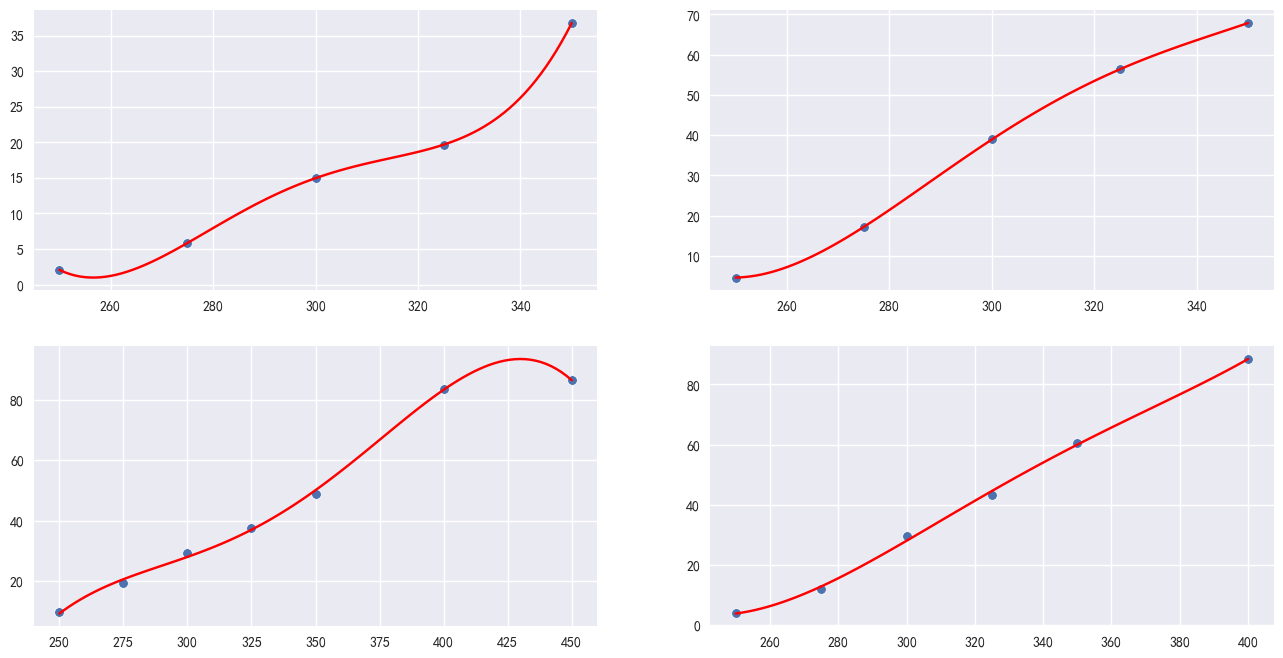

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [10]:
import numpy as np
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

index=['A1','A2','A3','A4']

for i in range(4):
    df1=data1[data1['催化剂组合编号']==index[i]]
    #线性拟合
    from sklearn.linear_model import LinearRegression
    x=df1['温度'].values
    y=df1['乙醇转化率(%)'].values
    
    #多项式拟合
    mymodel=np.poly1d(np.polyfit(x,y,4)) #四阶
    
    #显示系数
    print(np.polyfit(x, y, 4))
    #系数有5个，分别代表x^4, x^3, x^2, x^1的系数和常数项

    if(i<2):
        myline=np.linspace(250,350,100)
    elif(i==2):
        myline=np.linspace(250,450,100)
    else:
        myline=np.linspace(250,400,100)
    
    plt.figure(figsize=(6, 4))  # 设置宽度为 8 英寸，高度为 6 英寸
    sns.scatterplot(x=x,y=y,ax=axes[i//2][i%2])
    
    # 绘制多项式拟合直线
    axes[i//2][i%2].plot(myline, mymodel(myline), color='red', label='Linear Fit')

## 相关性分析
按理来说这里应该是先做的，先定性后定量

这里就画画热图


In [11]:
input_list=data1['催化剂组合编号'].unique().tolist()
input_list

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7']

IndexError: list index out of range

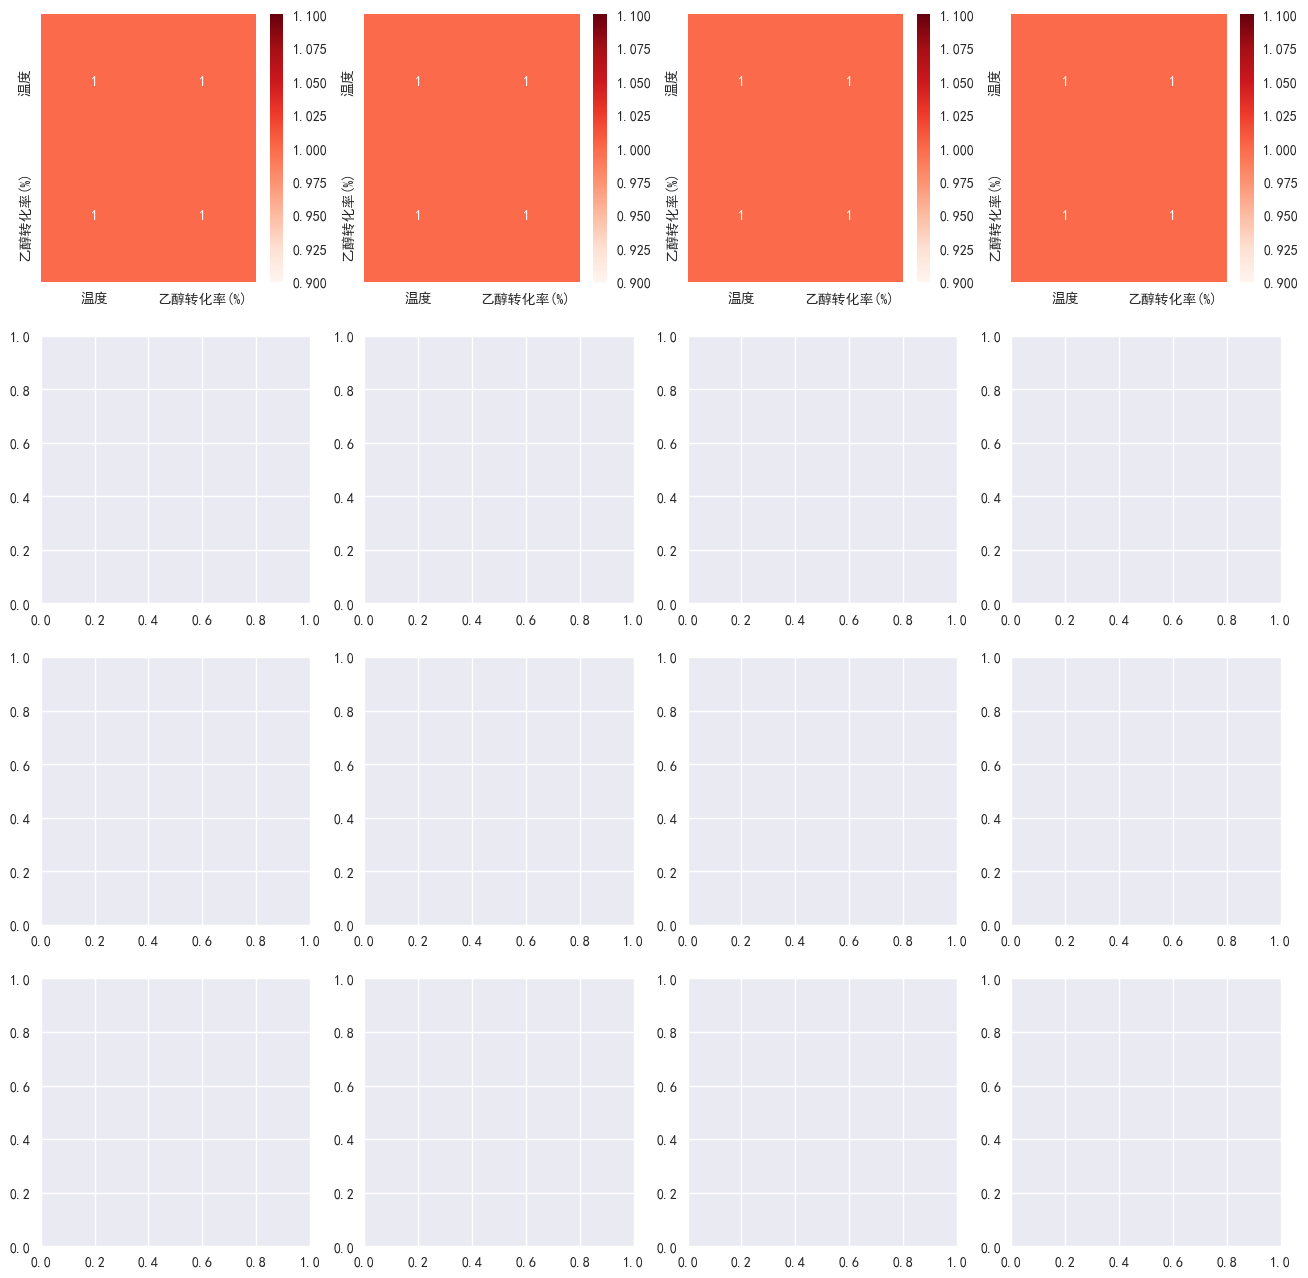

In [12]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

index=index[:16]

for i in range(16):
    name=index[i]
    df_temp=data1[data1['催化剂组合编号']==name]
    df_temp=df_temp[['温度','乙醇转化率(%)']]
    
    # Spearman 相关性分析
    corr = df_temp.corr(method='spearman')
    
    # 绘制相关系数热力图
    sns.heatmap(corr, annot=True, cmap="Reds",ax=axes[i//4][i%4])


上图可以得出结论即与温度高度正相关，结合我们的多项式曲线便可以从定性角度和定量角度同时说明

## 第二小问
同理，主要是调参，找到最好的拟合方程，同样以A1A2A3A4为例

In [ ]:
# 修复seaborn负号和中文显示乱码的问题
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial']  # 设置合适的字体，如 Arial
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置支持中文的字体，如黑体
plt.rcParams['axes.unicode_minus'] = False     # 解决负号显示问题
plt.rcParams['figure.dpi'] = 100              # 调整图形分辨率

fig, axes = plt.subplots(2, 2, figsize=(16, 8))

index=['A1','A2','A3','A4']

for i in range(4):
    df1=data1[data1['催化剂组合编号']==index[i]]
    #线性拟合
    from sklearn.linear_model import LinearRegression
    #实例化线性模型
    x=df1['温度'].values
    y=df1['C4烯烃选择性(%)'].values
    lr = LinearRegression()
    lr.fit(x.reshape(-1,1), y.reshape(-1,1))
    y_predict = lr.predict(x.reshape(-1,1))

    plt.figure(figsize=(6, 4))  # 设置宽度为 8 英寸，高度为 6 英寸

    sns.scatterplot(x=x,y=y,ax=axes[i//2][i%2])
    # 绘制线性拟合直线
    axes[i//2][i%2].plot(x, y_predict, color='red', label='Linear Fit')


In [ ]:
import numpy as np
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

index=['A1','A2','A3','A4']

for i in range(4):
    df1=data1[data1['催化剂组合编号']==index[i]]
    #线性拟合
    from sklearn.linear_model import LinearRegression
    x=df1['温度'].values
    y=df1['C4烯烃选择性(%)'].values
    
    #多项式拟合
    mymodel=np.poly1d(np.polyfit(x,y,3)) #3阶
    
    #显示系数
    print(np.polyfit(x, y, 3))
    #系数有5个，分别代表x^4, x^3, x^2, x^1的系数和常数项

    if(i<2):
        myline=np.linspace(250,350,100)
    elif(i==2):
        myline=np.linspace(250,450,100)
    else:
        myline=np.linspace(250,400,100)
    
    plt.figure(figsize=(6, 4))  # 设置宽度为 8 英寸，高度为 6 英寸
    sns.scatterplot(x=x,y=y,ax=axes[i//2][i%2])
    
    # 绘制多项式拟合直线
    axes[i//2][i%2].plot(myline, mymodel(myline), color='red', label='Linear Fit')

In [ ]:
import numpy as np
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

index=['A1','A2','A3','A4']

for i in range(4):
    df1=data1[data1['催化剂组合编号']==index[i]]
    #线性拟合
    from sklearn.linear_model import LinearRegression
    x=df1['温度'].values
    y=df1['C4烯烃选择性(%)'].values
    
    #多项式拟合
    mymodel=np.poly1d(np.polyfit(x,y,4)) #3阶
    
    #显示系数
    print(np.polyfit(x, y, 4))
    #系数有5个，分别代表x^4, x^3, x^2, x^1的系数和常数项

    if(i<2):
        myline=np.linspace(250,350,100)
    elif(i==2):
        myline=np.linspace(250,450,100)
    else:
        myline=np.linspace(250,400,100)
    
    plt.figure(figsize=(6, 4))  # 设置宽度为 8 英寸，高度为 6 英寸
    sns.scatterplot(x=x,y=y,ax=axes[i//2][i%2])
    
    # 绘制多项式拟合直线
    axes[i//2][i%2].plot(myline, mymodel(myline), color='red', label='Linear Fit')

经过调参同理可得四阶的效果最好

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

index=input_list
index=index[:16]

for i in range(16):
    name=index[i]
    df_temp=data1[data1['催化剂组合编号']==name]
    df_temp=df_temp[['温度','C4烯烃选择性(%)']]
    
    # Spearman 相关性分析
    corr = df_temp.corr(method='spearman')
    
    # 绘制相关系数热力图
    sns.heatmap(corr, annot=True, cmap="Reds",ax=axes[i//4][i%4])


依然是强正相关

## 第三小问
对附件 2 中 350 度时给定的催化剂组合在一次实验不同时间的测试结果进行分析

这题的思路主要就是画图然后看图说话，所以主要来画个图，这里主要可以使用双y轴图

In [ ]:
df2

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文

# 创建图像和坐标轴
fig, ax1 = plt.subplots(figsize=(8, 5), dpi=120)
ax2 = ax1.twinx()  # 创建第二个y轴

# 数据（假设df2是已经定义好的）
x = [20, 70, 110, 163, 197, 240, 273]
y1 = df2['乙醇转化率(%)']
y2 = df2['乙烯选择性']
y3 = df2['C4烯烃选择性']
y4 = df2['乙醛选择性']
y5 = df2['碳数为4-12脂肪醇']
y6 = df2['甲基苯甲醛和甲基苯甲醇']

# 绘制曲线
ax1.plot(x, y1, color='tab:blue', marker='o', label='乙醇转化率')
ax2.plot(x, y2, color='tab:orange', linestyle='--', label='乙烯选择性')
ax2.plot(x, y3, color='tab:green', linestyle='--', label='C4烯烃选择性')
ax2.plot(x, y4, color='tab:red', linestyle='--', label='乙醛选择性')
ax2.plot(x, y5, color='tab:purple', linestyle='--', label='碳数为4-12脂肪醇')
ax2.plot(x, y6, color='tab:brown', linestyle='--', label='甲基苯甲醛和甲基苯甲醇')

# 设置标签和标题
ax1.set_xlabel('时间')
ax1.set_ylabel('乙醇转化率', color='tab:blue')
ax2.set_ylabel('选择性', color='black')
ax1.set_title("350℃下乙醇转化率和各种生成物的选择性随时间变化曲线")

# 隐藏y轴2的刻度线
ax2.tick_params(axis='y', labelcolor='black')

# 设置图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
legend = ax2.legend(lines + lines2, labels + labels2, bbox_to_anchor=(0.05, 0.5), loc='upper left')

# 隐藏网格线
ax1.grid(False)
ax2.grid(False)

# 调整布局
fig.tight_layout()

# 显示图像
plt.show()


随着反应的进行，乙醇转化率降低，也即乙醇的反应速率在下降，原因是乙醇的浓度在降低。在这个过程中，乙醇不断脱氢生成乙醛，乙醛的生成速率大于其消耗速率，因此乙醛在生成物中的占比不断增加，其选择性增加。由于 C4 烯烃制备过程的最后一步通常是由脂肪醇脱水生成，因此反应进行到 200 分钟时，脂肪醇和 C4 烯烃的选择性的变化趋势基本相同。当反应进行 240 分钟后，乙醇转化率不再随时间发生变化，也即乙醇的反应速率保持不变，因此可认为反应在 240 分钟时达到平衡态。

# 第二问
探讨不同催化剂组合及温度对乙醇转化率以及 C4 烯烃选择性大小的影响。首先定性方面可以使用方差分析，即告诉你“有没有”的问题；定量方面可以使用回归分析，即告诉你影响有多大的问题

## 单因素方差检验
https://www.bilibili.com/video/BV1z5411u7MH/?spm_id_from=333.337.search-card.all.click&vd_source=4bccf0bae6366f8cf252ccd21d3e6844

https://zhuanlan.zhihu.com/p/645822457

此外，scipy的库可以直接做单因素方差检验：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway

### 前置条件
1. 正态分布
2. 方差齐性检验
    1) Barlett检验
    2) Levene检验

### 进一步分析
1. LSD-t检验
2. Bonferroni法

## 双因素方差检验

In [ ]:
data1

因为要研究不同催化剂的组合，所以要进一步处理这个dataframe，这样就得到了不同催化剂的指标

In [ ]:
CoSiO_mass = [200]*5+[200]*5+[200]*7+[200]*6+[200]*6+[200]*5+[50]*5+[50]*5+[50]*5+[50]*5+[50]*5+[50]*5+[67]*5+[33]*5+[50]*5+[100]*5+[10]*6+[25]*6+[50]*6+[75]*6+[100]*6
CoSiO_density = [1]*5+[2]*5+[1]*7+[0.5]*6+[2]*6+[5]*5+[1]*5+[1]*5+[1]*5+[5]*5+[1]*5+[1]*5+[1]*5+[1]*5+[1]*5+[1]*5+[1]*6+[1]*6+[1]*6+[1]*6+[1]*6
data1['CoSiO质量'] = CoSiO_mass
data1['CoSiO浓度'] = CoSiO_density

HAP_mass = [200]*5+[200]*5+[200]*7+[200]*6+[200]*6+[200]*5+[50]*5+[50]*5+[50]*5+[50]*5+[90]*5+[50]*5+[67]*5+[33]*5+[50]*5+[100]*5+[10]*6+[25]*6+[50]*6+[75]*6+[100]*6
data1['HAP质量'] = HAP_mass

Ethanol_density = [1.68]*5+[1.68]*5+[0.9]*7+[1.68]*6+[0.3]*6+[1.68]*5+[0.3]*5+[0.9]*5+[2.1]*5+[2.1]*5+[1.68]*5+[1.68]*5+[1.68]*5+[1.68]*5+[1.68]*5+[1.68]*5+[1.68]*6+[1.68]*6+[2.1]*6+[1.68]*6+[0.9]*6
data1['乙醇浓度'] = Ethanol_density

data1